In [9]:
!pip install scikit-fuzzy

Enter data for error detection:
Data Redundancy (0-100): 20
Degradation Level (0-100): 40
Error History (0-100): 30

Error Likelihood: 31.755810251512283


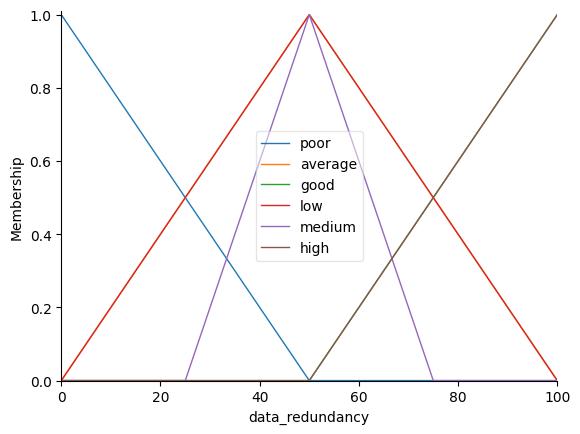

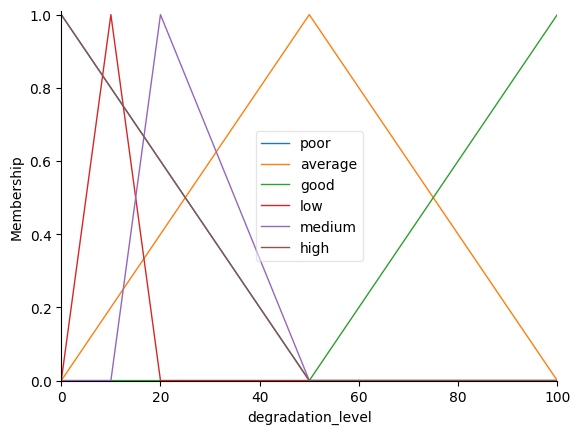

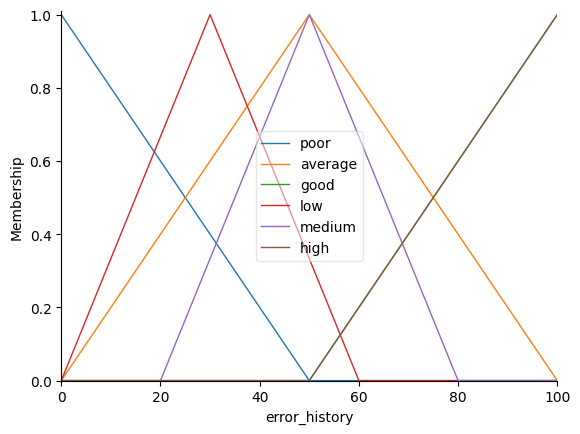

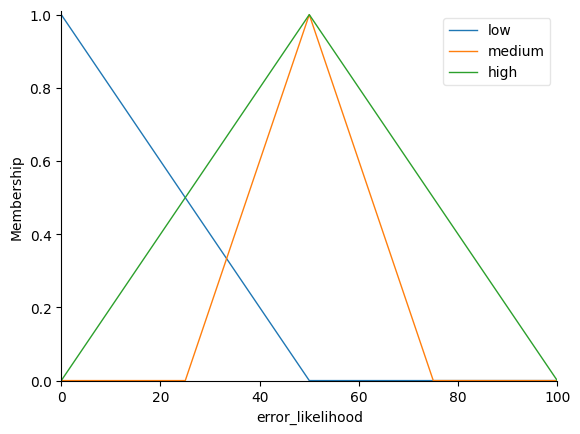

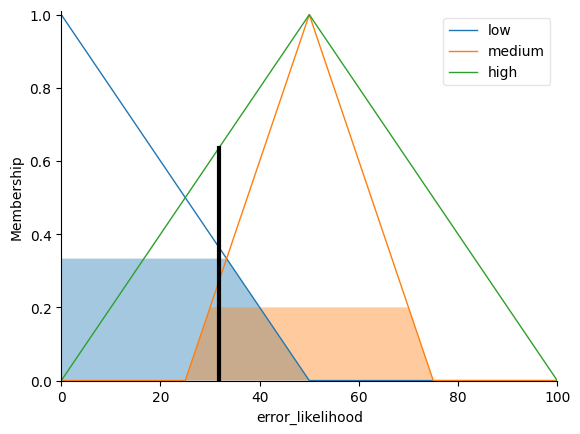

In [32]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Step 3: Fuzzification - Define linguistic variables and fuzzy sets
data_redundancy = ctrl.Antecedent(np.arange(0, 101, 1), 'data_redundancy')
degradation_level = ctrl.Antecedent(np.arange(0, 101, 1), 'degradation_level')
error_history = ctrl.Antecedent(np.arange(0, 101, 1), 'error_history')

data_redundancy.automf(3)
degradation_level.automf(3)
error_history.automf(3)

# Create custom membership functions for data_redundancy
data_redundancy['low'] = fuzz.trimf(data_redundancy.universe, [0, 50, 100])
data_redundancy['medium'] = fuzz.trimf(data_redundancy.universe, [25, 50, 75])
data_redundancy['high'] = fuzz.trimf(data_redundancy.universe, [50, 100, 100])

# Create custom membership functions for degradation_level
degradation_level['low'] = fuzz.trimf(degradation_level.universe, [0,10,20])
degradation_level['medium'] = fuzz.trimf(degradation_level.universe, [10,20,50])
degradation_level['high'] = fuzz.trimf(degradation_level.universe, [0, 0, 50])

# Create custom membership functions for error_history
error_history['low'] = fuzz.trimf(error_history.universe, [0,30,60])
error_history['medium'] = fuzz.trimf(error_history.universe, [20, 50, 80])
error_history['high'] = fuzz.trimf(error_history.universe, [50, 100, 100])

# Custom membership functions can be built interactively with a familiar,
# Pythonic API
error_likelihood = ctrl.Consequent(np.arange(0, 101, 1), 'error_likelihood')
error_likelihood['low'] = fuzz.trimf(error_likelihood.universe, [0, 0, 50])
error_likelihood['medium'] = fuzz.trimf(error_likelihood.universe, [25, 50, 75])
error_likelihood['high'] = fuzz.trimf(error_likelihood.universe, [0, 50, 100])

# You can see how these look with .view()
data_redundancy.view()
degradation_level.view()
error_history.view()
error_likelihood.view()

# Step 4: Fuzzy Rules
""" RULE 1:
Antecedent conditions (IF part):
    data_redundancy['high']: If the data redundancy is high.
    degradation_level['low']: and the degradation level is low.
    error_history['medium']: and the error history is medium.
Consequent (THEN part):
  error_likelihood['low']: THEN the error likelihood is low."""
rule1 = ctrl.Rule(data_redundancy['high'] & degradation_level['low'] & error_history['medium'], error_likelihood['low'])
rule2 = ctrl.Rule(data_redundancy['medium'] & degradation_level['medium'] & error_history['medium'], error_likelihood['medium'])
rule3 = ctrl.Rule(data_redundancy['low'] & degradation_level['high'] & error_history['high'], error_likelihood['high'])
rule4 = ctrl.Rule(data_redundancy['high'] & degradation_level['medium'] & error_history['low'], error_likelihood['low'])
rule5 = ctrl.Rule(data_redundancy['low'] & degradation_level['low'] & error_history['high'], error_likelihood['medium'])
rule6 = ctrl.Rule(data_redundancy['high'] & degradation_level['high'] & error_history['medium'], error_likelihood['high'])
rule7 = ctrl.Rule(data_redundancy['medium'] & degradation_level['low'] & error_history['low'], error_likelihood['medium'])
rule8 = ctrl.Rule(data_redundancy['low'] & degradation_level['medium'] & error_history['high'], error_likelihood['high'])
rule9 = ctrl.Rule(data_redundancy['medium'] & degradation_level['medium'] & error_history['low'], error_likelihood['low'])
rule10 = ctrl.Rule(data_redundancy['high'] & degradation_level['low'] & error_history['high'], error_likelihood['high'])
rule11 = ctrl.Rule(data_redundancy['low'] & degradation_level['high'] & error_history['medium'], error_likelihood['medium'])
rule12 = ctrl.Rule(data_redundancy['medium'] & degradation_level['high'] & error_history['high'], error_likelihood['high'])
rule13 = ctrl.Rule(data_redundancy['high'] & degradation_level['medium'] & error_history['high'], error_likelihood['high'])
rule14 = ctrl.Rule(data_redundancy['medium'] & degradation_level['low'] & error_history['medium'], error_likelihood['medium'])
rule15 = ctrl.Rule(data_redundancy['low'] & degradation_level['high'] & error_history['low'], error_likelihood['low'])
rule16 = ctrl.Rule(data_redundancy['high'] & degradation_level['high'] & error_history['high'], error_likelihood['high'])
rule17 = ctrl.Rule(data_redundancy['medium'] & degradation_level['medium'] & error_history['high'], error_likelihood['medium'])
rule18 = ctrl.Rule(data_redundancy['high'] & degradation_level['high'] & error_history['low'], error_likelihood['low'])
rule19 = ctrl.Rule(data_redundancy['medium'] & degradation_level['medium'] & error_history['low'], error_likelihood['medium'])
rule20 = ctrl.Rule(data_redundancy['high'] & degradation_level['low'] & error_history['low'], error_likelihood['medium'])
rule21 = ctrl.Rule(data_redundancy['low'] & degradation_level['medium'] & error_history['medium'], error_likelihood['low'])
rule22 = ctrl.Rule(data_redundancy['medium'] & degradation_level['high'] & error_history['low'], error_likelihood['high'])
rule23 = ctrl.Rule(data_redundancy['high'] & degradation_level['medium'] & error_history['medium'], error_likelihood['medium'])
rule24 = ctrl.Rule(data_redundancy['medium'] & degradation_level['low'] & error_history['high'], error_likelihood['high'])
rule25 = ctrl.Rule(data_redundancy['low'] & degradation_level['high'] & error_history['high'], error_likelihood['high'])


# Step 5: Defuzzification
error_correction_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19, rule20, rule21, rule22, rule23, rule24, rule5])
error_correction = ctrl.ControlSystemSimulation(error_correction_ctrl)

# Step 6: User Interface (UI) - Design a simple command-line interface for testing
def user_interface():
    print("Enter data for error detection:")
    error_correction.input['data_redundancy'] = float(input("Data Redundancy (0-100): "))
    error_correction.input['degradation_level'] = float(input("Degradation Level (0-100): "))
    error_correction.input['error_history'] = float(input("Error History (0-100): "))

    # Crunch the numbers3
    error_correction.compute()


    print("\nError Likelihood:", error_correction.output['error_likelihood'])
    error_likelihood.view(sim=error_correction)

if __name__ == "__main__":
    user_interface()



## To Optimizing...


---



In [33]:
# Optimization: Adjust membership functions for linguistic variables

# For data_redundancy
data_redundancy['low'] = fuzz.trimf(data_redundancy.universe, [0, 10, 30])
data_redundancy['medium'] = fuzz.trimf(data_redundancy.universe, [20, 50, 80])
data_redundancy['high'] = fuzz.trimf(data_redundancy.universe, [70, 90, 100])

# For degradation_level
degradation_level['low'] = fuzz.trimf(degradation_level.universe, [40, 60, 80])
degradation_level['medium'] = fuzz.trimf(degradation_level.universe, [10, 40, 70])
degradation_level['high'] = fuzz.trimf(degradation_level.universe, [0, 20, 40])

# For error_history
error_history['low'] = fuzz.trimf(error_history.universe, [0, 10, 30])
error_history['medium'] = fuzz.trimf(error_history.universe, [20, 50, 80])
error_history['high'] = fuzz.trimf(error_history.universe, [70, 90, 100])